<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Confidence_Intervals_3_ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 ways to calculate confidence intervals
Generate random data of a skewed normal distribution and calculate confidence intervals using bootstrapping, Chebyshev's inequality, and normal distribution tables.

Let's generate random data for this

A skewed normal distribution, I will generate

In [84]:
import numpy as np
from scipy.stats import skewnorm

# Define parameters for the skewed normal distribution
loc = 0 # Location parameter
scale = 1 # Scale parameter
shape = 100 # Shape parameter (determines the skewness)

# Generate a dataset with skewed normal distribution
data_size = 1000 # Increased sample size
skewed_data = skewnorm.rvs(loc=loc, scale=scale, a=shape, size=data_size)

# Display the first few elements of the generated data
print(skewed_data[:10])

[1.1131792  0.61074217 1.39478297 0.66849893 0.30396249 0.171832
 0.63128809 0.08273175 0.05216262 0.63681142]


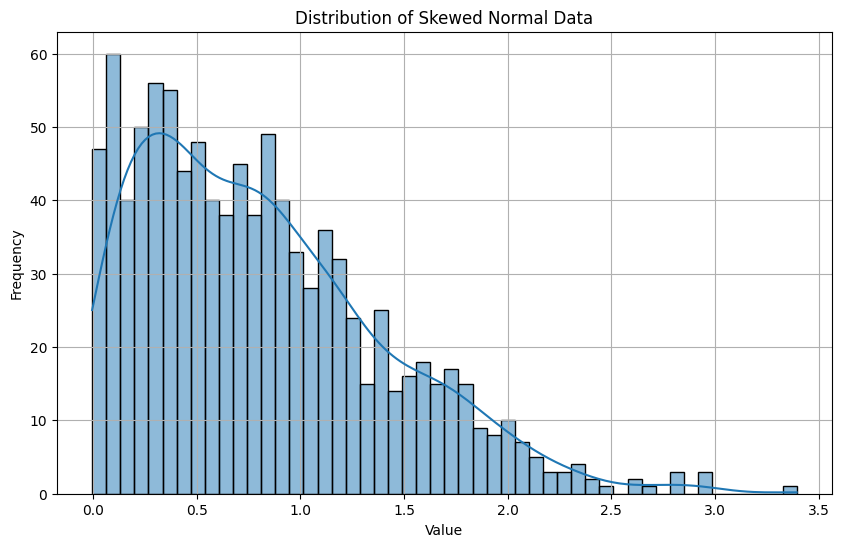

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the skewed data
plt.figure(figsize=(10, 6))
sns.histplot(skewed_data, kde=True, bins=50)
plt.title('Distribution of Skewed Normal Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bootstrapping and Confidence Interval Calculation

Bootstrapping is a statistical technique used to estimate the distribution of a population parameter by generating random samples based on sample parameters, such as the mean and variance. This method provides insight into the original population distribution.

## Process Overview

1. **Generate Random Samples**: Create multiple random samples (bootstrap samples) from the sample parameters (e.g., mean and variance).
2. **Distribution of Sample Means**: From these bootstrap samples, compute the sample means to form a distribution of sample means.
3. **Calculate 95% Confidence Interval**: Use the percentile method to determine the confidence interval.

## Confidence Interval Calculation

To calculate a 95% confidence interval:
- Ensure symmetry by dividing the remaining percentage ($100\% - 95\% = 5\%$) by 2, which gives $2.5\%$ ($0.025$).
- Add this value to $0$ and $0.95$ to obtain the percentiles $0.025$ and $0.975$.
- Identify the $0.025$th and $0.975$th percentiles from the distribution of sample means to define the lower and upper bounds of the 95% confidence interval.

## Connection to Monte Carlo Simulation

Bootstrapping is a part of the Monte Carlo simulation technique, which relies on repeated random sampling to estimate the properties of a statistical distribution.

In [86]:
# Define the number of bootstrap samples
n_bootstrap_samples = 10000

# Create an empty list to store the means of the bootstrap samples
bootstrap_means = []

# Loop through the specified number of bootstrap samples
for _ in range(n_bootstrap_samples):
    # Randomly sample with replacement from the skewed_data
    bootstrap_sample = np.random.choice(skewed_data, size=data_size, replace=True)

    # Calculate the mean of the bootstrap sample
    sample_mean = np.mean(bootstrap_sample)

    # Append the calculated mean to the list
    bootstrap_means.append(sample_mean)

# Calculate the desired confidence interval (e.g., 95%) from the distribution of bootstrap means
confidence_level = 0.95
alpha = 1 - confidence_level
lower_percentile = alpha / 2 * 100 #0.025
upper_percentile = (1 - alpha / 2) * 100 #0.975
# 0.975 - 0.025 = 0.95

lower_bound_bootstrap = np.percentile(bootstrap_means, lower_percentile)
upper_bound_bootstrap = np.percentile(bootstrap_means, upper_percentile)

# Display the calculated confidence interval
print(f"Bootstrapped {confidence_level*100}% Confidence Interval: ({lower_bound_bootstrap:.4f}, {upper_bound_bootstrap:.4f})")

Bootstrapped 95.0% Confidence Interval: (0.7722, 0.8454)


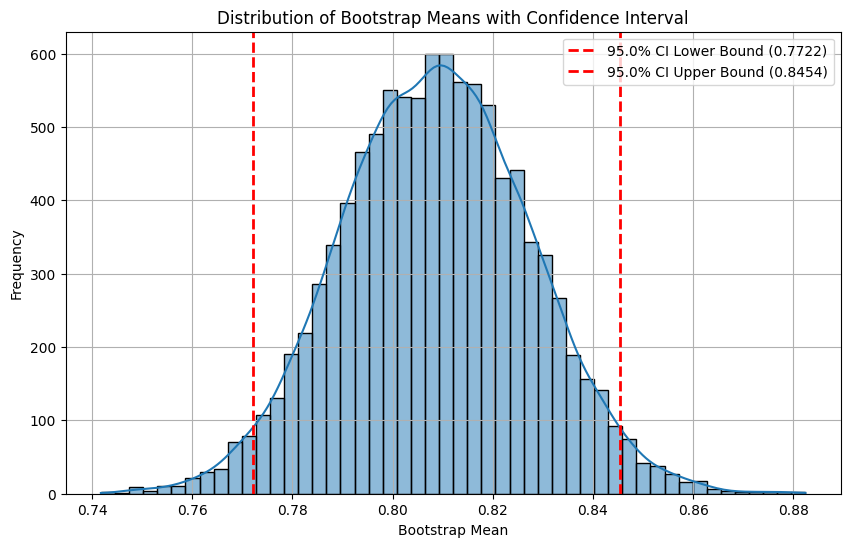

In [87]:
# Plot the distribution of bootstrap means with confidence interval lines
plt.figure(figsize=(10, 6))
x1 = sns.histplot(bootstrap_means, kde=True, bins=50)
plt.axvline(lower_bound_bootstrap, color='red', linestyle='dashed', linewidth=2, label=f'{confidence_level*100}% CI Lower Bound ({lower_bound_bootstrap:.4f})')
plt.axvline(upper_bound_bootstrap, color='red', linestyle='dashed', linewidth=2, label=f'{confidence_level*100}% CI Upper Bound ({upper_bound_bootstrap:.4f})')
plt.title('Distribution of Bootstrap Means with Confidence Interval')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Calculate confidence intervals using chebyshev's inequality


In [88]:
# Calculate the mean and standard deviation of the skewed_data
mean_skewed_data = np.mean(skewed_data)
std_skewed_data = np.std(skewed_data)

# Choose k based on the desired confidence level
# For a two-sided interval using Chebyshev's inequality, k = sqrt(1/alpha)
k = np.sqrt(1/alpha)

# Calculate the confidence interval using Chebyshev's inequality
lower_bound_chebyshev = mean_skewed_data - k * std_skewed_data
upper_bound_chebyshev = mean_skewed_data + k * std_skewed_data

# Print the calculated confidence interval
print(f"Chebyshev's Inequality for sample skewed values {confidence_level*100}% Confidence Interval: ({lower_bound_chebyshev:.4f}, {upper_bound_chebyshev:.4f})")

Chebyshev's Inequality for sample skewed values 95.0% Confidence Interval: (-1.8421, 3.4592)


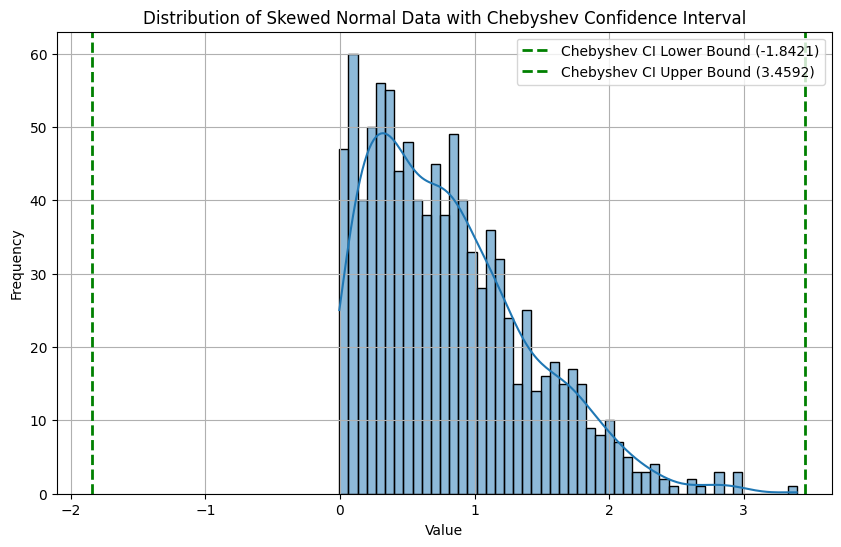

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the skewed data
plt.figure(figsize=(10, 6))
x3 = sns.histplot(skewed_data, kde=True, bins=50)

# Add lines for Chebyshev's confidence interval
plt.axvline(lower_bound_chebyshev, color='green', linestyle='dashed', linewidth=2, label=f'Chebyshev CI Lower Bound ({lower_bound_chebyshev:.4f})')
plt.axvline(upper_bound_chebyshev, color='green', linestyle='dashed', linewidth=2, label=f'Chebyshev CI Upper Bound ({upper_bound_chebyshev:.4f})')

plt.title('Distribution of Skewed Normal Data with Chebyshev Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Calculate the standard error of the mean (standard deviation of the sampling distribution of the mean)
# We can use the standard deviation of the original data divided by the square root of the sample size
# Or, for bootstrapping, we could use the standard deviation of the bootstrap_means
standard_error_mean = std_skewed_data / np.sqrt(data_size)

# Choose k based on the desired confidence level
# For a two-sided interval using Chebyshev's inequality, k = sqrt(1/alpha)
k_mean = np.sqrt(1/alpha)

# Calculate the confidence interval for the mean using Chebyshev's inequality
lower_bound_chebyshev_mean = mean_skewed_data - k_mean * standard_error_mean
upper_bound_chebyshev_mean = mean_skewed_data + k_mean * standard_error_mean

# Print the calculated confidence interval for the mean
print(f"Chebyshev's Inequality {confidence_level*100}% Confidence Interval for the Mean: ({lower_bound_chebyshev_mean:.4f}, {upper_bound_chebyshev_mean:.4f})")

Chebyshev's Inequality 95.0% Confidence Interval for the Mean: (0.7247, 0.8924)


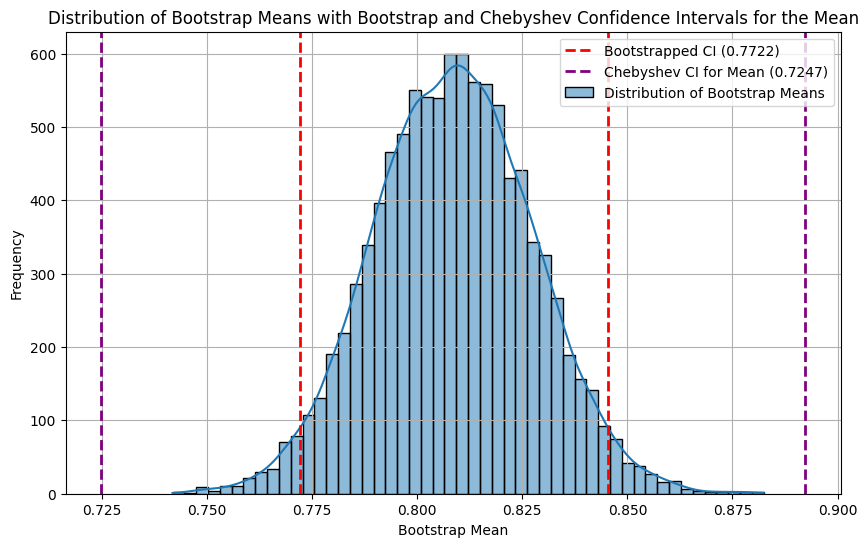

In [91]:
# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True, bins=50, label='Distribution of Bootstrap Means')

# Add lines for the bootstrap confidence interval
plt.axvline(lower_bound_bootstrap, color='red', linestyle='dashed', linewidth=2, label=f'Bootstrapped CI ({lower_bound_bootstrap:.4f})')
plt.axvline(upper_bound_bootstrap, color='red', linestyle='dashed', linewidth=2)

# Add lines for the Chebyshev confidence interval for the mean
plt.axvline(lower_bound_chebyshev_mean, color='purple', linestyle='dashed', linewidth=2, label=f'Chebyshev CI for Mean ({lower_bound_chebyshev_mean:.4f})')
plt.axvline(upper_bound_chebyshev_mean, color='purple', linestyle='dashed', linewidth=2)


plt.title('Distribution of Bootstrap Means with Bootstrap and Chebyshev Confidence Intervals for the Mean')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Chebyshev is a much loose bound because it makes assumption about data that sample size is very large and there are no skews

> It is often used to provide a general, distribution-free bound on the spread of individual data values around the mean, whereas the standard confidence interval using Normal Distribution tables is indeed calculated for the sample mean



<br>

**Chebyshev's Inequality's Weakness with Skewness:** Chebyshev's inequality is based on the idea of data being clustered around the mean. It gives a symmetric bound around the mean based on the standard deviation. However, in a skewed distribution, the data is not symmetrically distributed around the mean. There's a longer "tail" on one side. Because Chebyshev's inequality doesn't account for this asymmetry, the symmetric bounds it provides are necessarily very wide to guarantee the confidence level across any distribution, including highly skewed ones. It can't adapt to the specific shape of your skewed data

<br>

**Bootstrapping's Advantage with Skewness:** Bootstrapping, on the other hand, directly samples from your skewed data. When you repeatedly resample with replacement, you are capturing the characteristics of that skewness in your bootstrap samples. Consequently, the distribution of the bootstrap means will also reflect the skewness of the underlying data. By calculating percentiles on this distribution of bootstrap means, you are effectively using the empirical shape of the estimated sampling distribution, which is influenced by the original data's skewness. This allows bootstrapping to provide a more accurate and narrower confidence interval that is better suited to the actual data distribution

## Calculate confidence intervals using normal distribution tables

Sample Mean: The mean of the sample data, calculated as $\bar{x} = \frac{\sum x_i}{n}$.



Standard Error: The standard deviation of the sample mean, calculated as $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the population standard deviation.



Z-Score: For a 95% confidence interval, the Z-score is approximately $1.96$ (from normal distribution tables), corresponding to the $0.025$ and $0.975$ percentiles.



Margin of Error: Calculated as $Z \cdot \sigma_{\bar{x}}$.



Confidence Interval: The range is given by $\bar{x} \pm Z \cdot \frac{\sigma}{\sqrt{n}}$, resulting in the lower and upper bounds.

In [92]:
from scipy.stats import norm

# Calculate the standard error of the mean
standard_error = std_skewed_data / np.sqrt(data_size)

# Find the z-score for the desired confidence level (95%)
# We need the z-score that leaves alpha/2 in each tail
z_score = norm.ppf(1 - alpha/2)

# Calculate the confidence interval
lower_bound_normal = mean_skewed_data - z_score * standard_error
upper_bound_normal = mean_skewed_data + z_score * standard_error

# Print the calculated confidence interval
print(f"Normal Distribution {confidence_level*100}% Confidence Interval: ({lower_bound_normal:.4f}, {upper_bound_normal:.4f})")

Normal Distribution 95.0% Confidence Interval: (0.7718, 0.8453)


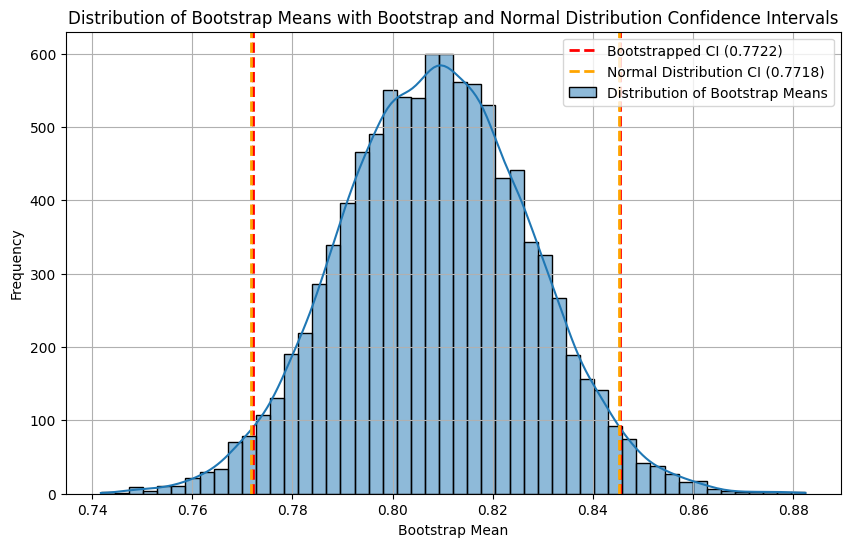

In [93]:
# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, kde=True, bins=50, label='Distribution of Bootstrap Means')

# Add lines for the bootstrap confidence interval
plt.axvline(lower_bound_bootstrap, color='red', linestyle='dashed', linewidth=2, label=f'Bootstrapped CI ({lower_bound_bootstrap:.4f})')
plt.axvline(upper_bound_bootstrap, color='red', linestyle='dashed', linewidth=2)

# Add lines for the Normal Distribution confidence interval
plt.axvline(lower_bound_normal, color='orange', linestyle='dashed', linewidth=2, label=f'Normal Distribution CI ({lower_bound_normal:.4f})')
plt.axvline(upper_bound_normal, color='orange', linestyle='dashed', linewidth=2)


plt.title('Distribution of Bootstrap Means with Bootstrap and Normal Distribution Confidence Intervals')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plotting all three together

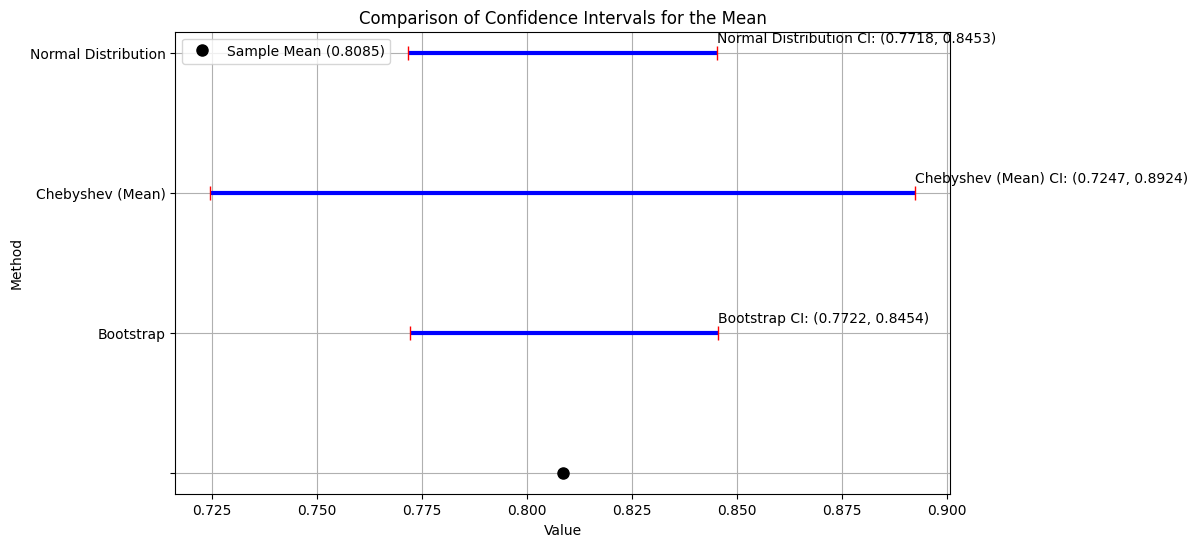

In [94]:
# Create a list of the lower and upper bounds for each method
methods = ['Bootstrap', 'Chebyshev (Mean)', 'Normal Distribution']
lower_bounds = [lower_bound_bootstrap, lower_bound_chebyshev_mean, lower_bound_normal]
upper_bounds = [upper_bound_bootstrap, upper_bound_chebyshev_mean, upper_bound_normal]

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the mean as a point
ax.plot(mean_skewed_data, 0, 'ko', markersize=8, label=f'Sample Mean ({mean_skewed_data:.4f})')

# Plot the confidence intervals as horizontal lines
for i in range(len(methods)):
    ax.hlines(i + 1, lower_bounds[i], upper_bounds[i], color='blue', linestyle='-', linewidth=3)
    ax.plot(lower_bounds[i], i + 1, 'r|', markersize=10) # Mark the lower bound
    ax.plot(upper_bounds[i], i + 1, 'r|', markersize=10) # Mark the upper bound
    ax.text(upper_bounds[i], i + 1.1, f'{methods[i]} CI: ({lower_bounds[i]:.4f}, {upper_bounds[i]:.4f})', va='center')


# Set the y-axis ticks and labels
ax.set_yticks(range(len(methods) + 1))
ax.set_yticklabels([''] + methods) # Add an empty label for the mean's row

# Set plot title and labels
plt.title('Comparison of Confidence Intervals for the Mean')
plt.xlabel('Value')
plt.ylabel('Method')
plt.legend()
plt.grid(True)
plt.show()

As no of samples increase, Bootstrap CI coincides with normal table CI due to CLT, but in smaller sample sized and high skew rate, Bootstrap method is much more reliable since it considers values around the actual mean position (mean can change is skew is high), whereas normal tables and chebyshev consider mean to be at the centre even in skewed cases and might give less accurate values if sample size is small (less effect of CLT i.e skewness diminishing effect due to more samples)